In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mobipy.plotting as mplt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
app = mobipy.Model_Application.build_from_model_and_data_file('../models/nivafjord_simplycnp_model.txt', 
                                                              '../models/data/NIVAFjord/nivafjord_drammen.dat')

Overriding property "Cloud cover" with an input series.
Overriding property "Air pressure" with an input series.
The parameter group "Mixing parameters" in the module "NIVAFjord basin" does not contain a parameter named "Mixing factor reference". The version of the module in the model code is newer than the version in the data, so this may be due to a change in the model. If you save over this data file, the parameter will be removed from the data.
In WARNING: The module "NIVAFjord chemistry" does not contain the parameter group "Phytoplankton". This data will be discarded if the data set is saved.

The parameter group "Initial chem" in the module "NIVAFjord sediments" does not contain a parameter named "Initial sediment N fraction". The version of the module in the model code is newer than the version in the data, so this may be due to a change in the model. If you save over this data file, the parameter will be removed from the data.
The parameter group "Initial chem" in the module "

In [3]:
# Set parameter values and run the model
app.start_date = '2018-01-01'
app.end_date = '2019-12-01'
app.run()

True

In [4]:
# Extract slices of the temperature and salinity results.
temp, dates = app.layer.water.temp["Drammensfjorden", :18]
sal,  dates = app.layer.water.salinity["Drammensfjorden", :18]

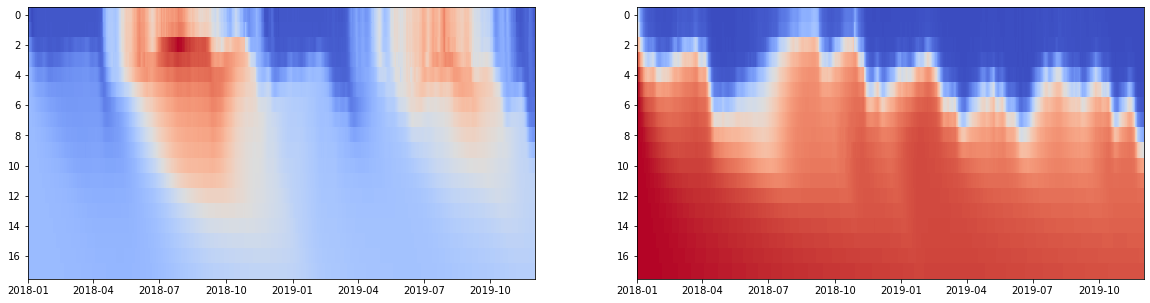

In [5]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 5))
ys = range(temp.shape[1])
mplt.quick_heatmap(ax0, temp, dates, ys)
mplt.quick_heatmap(ax1, sal, dates, ys)

Text(0, 0.5, '[m³ s⁻¹]')

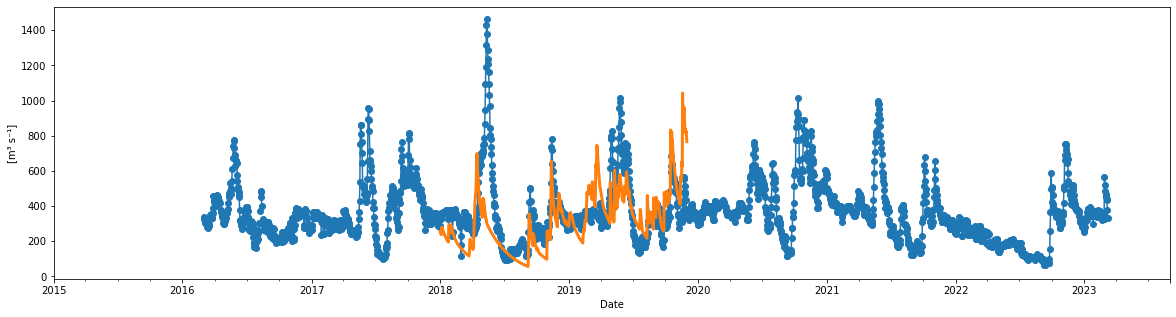

In [6]:
modq = app.var("River discharge to fjord")
obsq = app.var("Obs Q Mjondalen")
fig, ax = plt.subplots(1, figsize=(20, 5))
obsq[()].plot(ax = ax, marker='o')
modq["Drammenselva"].plot(ax = ax, linewidth=3)
ax.set_ylabel('[' + obsq.unit() + ']')